# Plant Seedlings Classification
_Introduction to Computer Vision_

__Joseph Reves joe.reves@gmail.com__

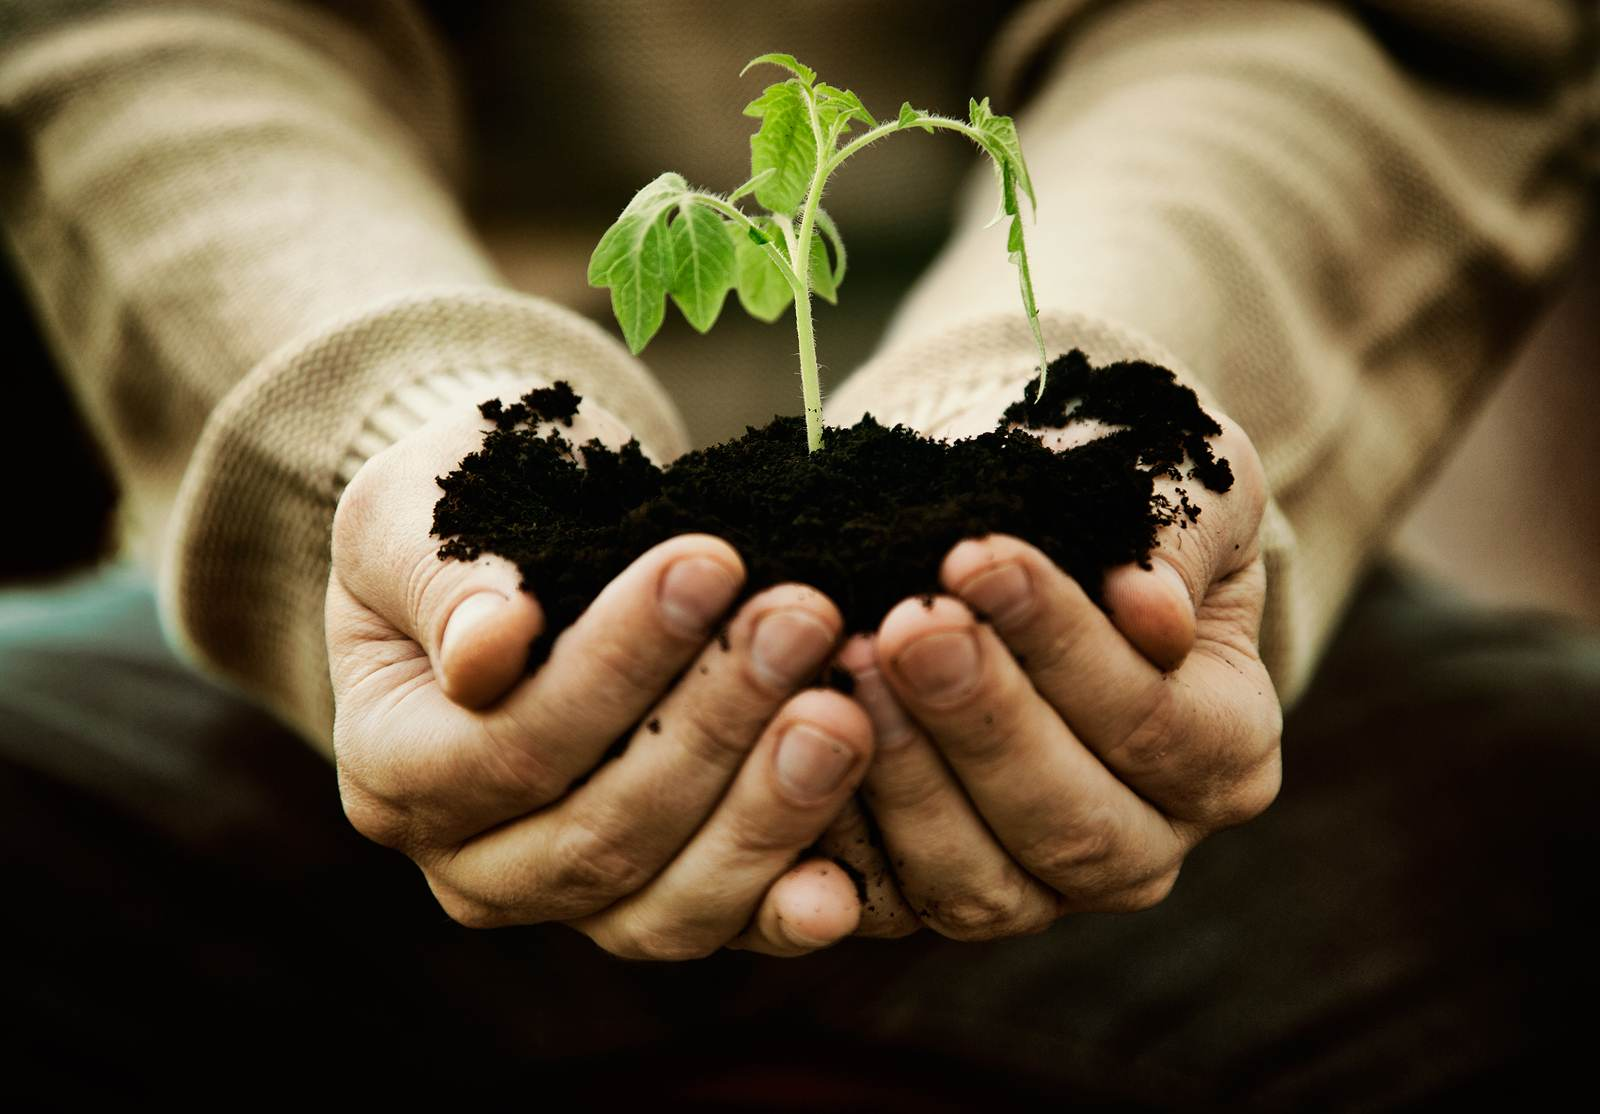

## Context and Objectives

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.

__Objective__

The aim of this project is to Build a Convolutional Neural Network to classify plant seedlings into their respective categories.

__Key Questions__

* How are these different category plant images different from each other?
* How balanced is the data in the provided dataset?

__Data Description__

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing images of unique plants belonging to 12 different species.

The data file names are:

* images.npy
* Label.csv

The goal of the project is to create a classifier capable of determining a plant's species from an image.

**Species Present in the data include:**
- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

## Assignment Objectives

__Exploratory Data Analysis__
* Define the problem statement
  * Read the dataset and print the overview of the data (statistical summary, shape, info, etc)
* Plot random images from each of the classes and print their corresponding labels
* Count Plot for each category
* Key meaningful observations from EDA

__Data Pre-processing__
* Convert the BGR images to RGB images
* Resize the images
* Plot the images before and after the pre-processing steps
* Split the data into train and test
* Categorical Encoding for the target variables
* Apply the normalization

__Model building__
* Build a Convolution Neural Network
* Evaluate the model on different performance metrics and comment on the performance
  * e.g., precision, recall, accuracy
* Plot confusion matrix

__Model Performance Improvement and Final Model Selection__
* Build an additional model using data augmentation to overcome the imbalance problem
* Evaluate the model on different performance metrics and comment on the performance
* Plot confusion matrix
* Choose the best model and explain the rationale for the selection

__Actionable Insights & Recommendations__
* Key takeaways for the business
* Recommendations to the business

__Notebook - Overall quality__
* Structure and flow
 * Crispness
 * Visual appeal 
 * Well commented code
* Conclusion and business presentation

## Importing necessary libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library for creating data paths
import os

# useful utilities
import random
import seaborn as sns
import math
from tabulate import tabulate

# oversampling
from imblearn.over_sampling import SMOTE

# sklearn utilities
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.utils import shuffle

# Library for creating and showing plots
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

# Tensorflow
import tensorflow as tf
from tensorflow.keras import backend

# Importing all the required sub-modules from Keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.layers import (
    Dense,
    Dropout,
    Flatten,
    Conv2D,
    MaxPooling2D,
    BatchNormalization,
    Activation,
    LeakyReLU,
)
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
from keras_visualizer import visualizer

# Opencv Library
import cv2

# Libraries for keras model visualization
import visualkeras
from PIL import ImageFont
from keras_visualizer import visualizer

# Supress Warnings
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [2]:
# Version, and GPU availability
print("TensorFlow version:", tf.__version__)
print("Number of GPUs Available: ", len(tf.config.list_physical_devices("GPU")))

TensorFlow version: 2.10.0
Number of GPUs Available:  1


<IPython.core.display.Javascript object>

<div class="alert alert-block alert-info">
<b>Dependency:</b> For this project, I'm using Anaconda on my local machine with GPU processing on my AMD GPU enabled. 
I've installed Microsoft's DirectML-Plugin to enable the backend for TensorFlow.
</div>

## Loading the dataset

<div class="alert alert-block alert-info">
<b>Dependency:</b> Loading the "images.npy" and "Labels.csv" datasets from the local directory where the notebook is stored.
</div>

In [3]:
# Mount Google drive to access the dataset
# Run the below code if you using google colab
# from google.colab import drive
# drive.mount('/content/drive')

<IPython.core.display.Javascript object>

In [4]:
# Load the images of the seedlings.  These are stored as a numpy array on disk
seedlings = np.load("images.npy")

<IPython.core.display.Javascript object>

In [5]:
# Load the labels for our seedling images
species = pd.read_csv("Labels.csv")

<IPython.core.display.Javascript object>

## Data Overview

### Understand the shape of the dataset

In [6]:
# shape of the images numpy array
seedlings.shape

(4750, 128, 128, 3)

<IPython.core.display.Javascript object>

That's 4750 images of 128x128 pixels, with three color channels

In [7]:
# shape of the species labels
species.shape

(4750, 1)

<IPython.core.display.Javascript object>

In [8]:
# let's see what the species labels look like
species.sample(5)

Label
4051       Black-grass
4333  Loose Silky-bent
2069          Charlock
1183   Shepherds Purse
3476        Sugar beet

<IPython.core.display.Javascript object>

In [9]:
# And a single image
seedlings[0]

array([[[ 35,  52,  78],
        [ 36,  49,  76],
        [ 31,  45,  69],
        ...,
        [ 78,  95, 114],
        [ 76,  93, 110],
        [ 80,  95, 109]],

       [[ 33,  46,  68],
        [ 37,  50,  73],
        [ 48,  65,  83],
        ...,
        [ 81,  96, 113],
        [ 74,  89, 105],
        [ 83,  95, 109]],

       [[ 34,  50,  68],
        [ 35,  52,  72],
        [ 70,  85, 101],
        ...,
        [ 83,  97, 112],
        [ 79,  94, 108],
        [ 79,  94, 107]],

       ...,

       [[ 35,  50,  69],
        [ 42,  57,  73],
        [ 42,  57,  72],
        ...,
        [ 60,  76,  92],
        [ 67,  81,  97],
        [ 64,  77,  95]],

       [[ 36,  52,  67],
        [ 48,  63,  78],
        [ 41,  57,  73],
        ...,
        [ 44,  66,  83],
        [ 58,  76,  91],
        [ 57,  74,  90]],

       [[ 44,  58,  70],
        [ 43,  57,  73],
        [ 40,  55,  72],
        ...,
        [ 41,  70,  92],
        [ 55,  78,  97],
        [ 61,  79,  96]]

<IPython.core.display.Javascript object>

## Exploratory Data Analysis

In [10]:
# Quick look at the distribution of labels in our dataset
print(species.value_counts())

Label                    
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
dtype: int64


<IPython.core.display.Javascript object>

In [11]:
# save a list of species labels
species_array = species["Label"].unique()
species_labels = species_array.tolist()

<IPython.core.display.Javascript object>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Loose Silky-bent'),
  Text(1, 0, 'Common Chickweed'),
  Text(2, 0, 'Scentless Mayweed'),
  Text(3, 0, 'Small-flowered Cranesbill'),
  Text(4, 0, 'Fat Hen'),
  Text(5, 0, 'Charlock'),
  Text(6, 0, 'Sugar beet'),
  Text(7, 0, 'Cleavers'),
  Text(8, 0, 'Black-grass'),
  Text(9, 0, 'Shepherds Purse'),
  Text(10, 0, 'Common wheat'),
  Text(11, 0, 'Maize')])

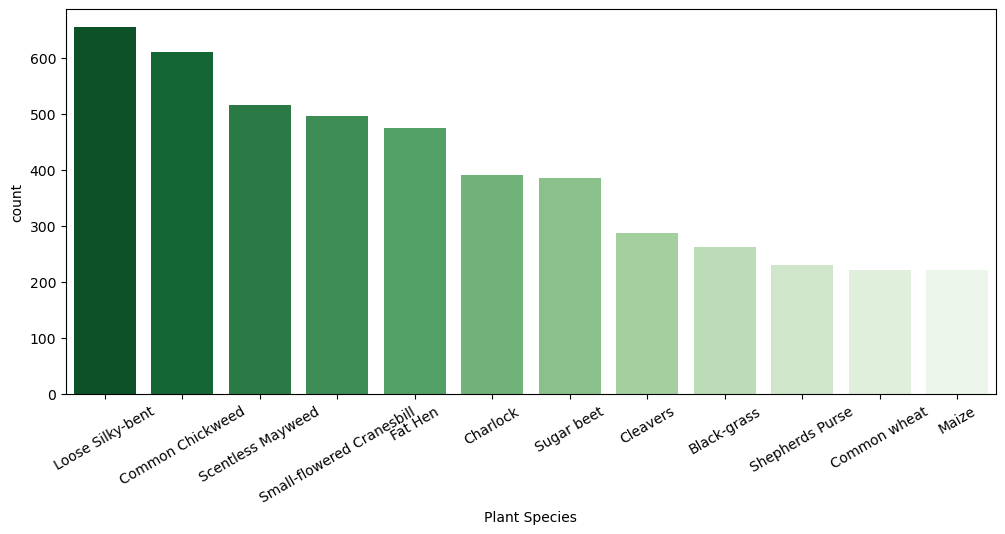

<IPython.core.display.Javascript object>

In [12]:
# Let's plot out the distribution of our species
plt.rcParams["figure.figsize"] = (12, 5)
sns.countplot(
    x=species.iloc[:, -1],
    order=species["Label"].value_counts().index,
    palette="Greens_r",
)
plt.xlabel("Plant Species")
plt.xticks(rotation=30)

* We've got 128 square pixel images; we'll probably want to resize those
* We have color images we may need to transform, or convert to b&w
* We'll need to encode our labels for these images
* Our data set is significantly unbalanced

#### Useful Functions

In [13]:
# Define a function to display a random grid of our images from a numpy array
def random_image_grid(image_array):
    rows = 3  # Defining number of rows=3
    cols = 4  # Defining number of columns=4
    fig = plt.figure(figsize=(10, 8))  # Defining the figure size to 10x8

    for i in range(cols):
        for j in range(rows):
            random_index = np.random.randint(
                0, len(species)
            )  # Generating random indices from the data and plotting the images

            ax = fig.add_subplot(
                rows, cols, i * rows + j + 1
            )  # Adding subplots with 3 rows and 4 columns

            ax.imshow(image_array[random_index])

            species_label = species.loc[random_index, "Label"]
            ax.set_title(species_label)

    plt.tight_layout()  # Adjusting the layout to prevent overlapping
    plt.show()

<IPython.core.display.Javascript object>

### Let's start with our original images

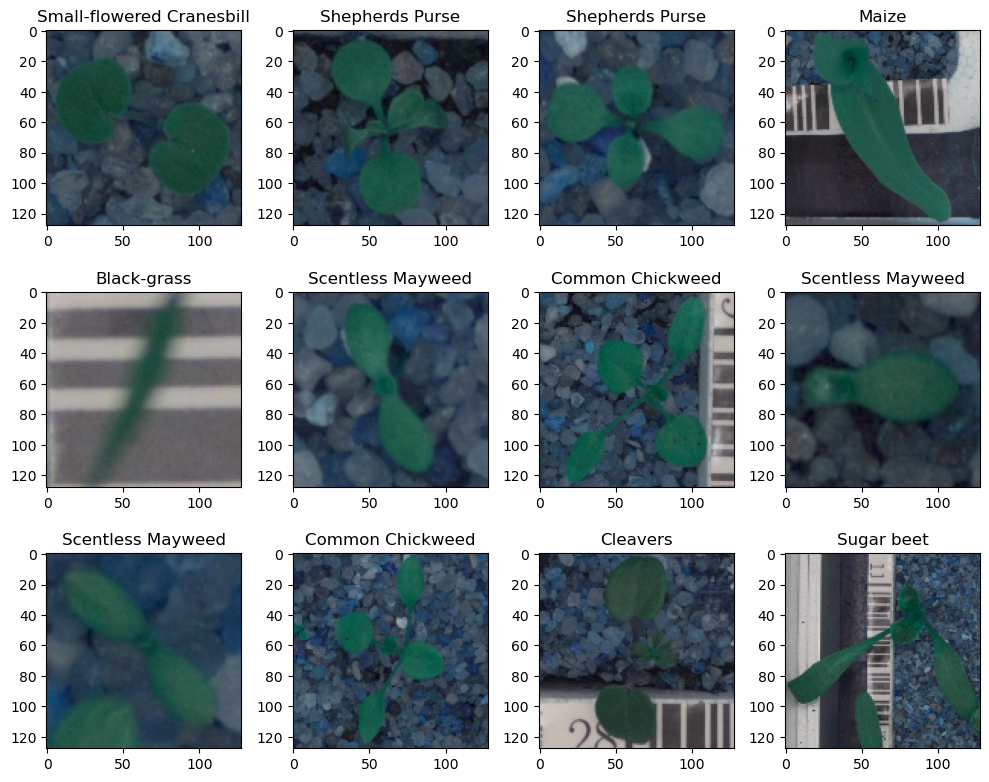

<IPython.core.display.Javascript object>

In [14]:
# View a selection of our original images
random_image_grid(seedlings)

* These look like BGR images (with a bluish tint)
* Some of these include barcode identifiers, in various orientations
* The background includes the media or soil, at various focal lengths
* Some of these photos are pretty blurry
* The photos we have are in random orientations
* __We're really interested in the green leaves, so we need to mask out the noisy background__

## Data Pre-Processing

### Convert the BGR images to RGB images.

In [15]:
# converting BGR images to RGB
rgb_seedlings = []
for bgr_image in seedlings:
    rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
    rgb_seedlings.append(rgb_image)

# Convert the list of RGB images back to a NumPy array
rgb_seedlings = np.array(rgb_seedlings)

<IPython.core.display.Javascript object>

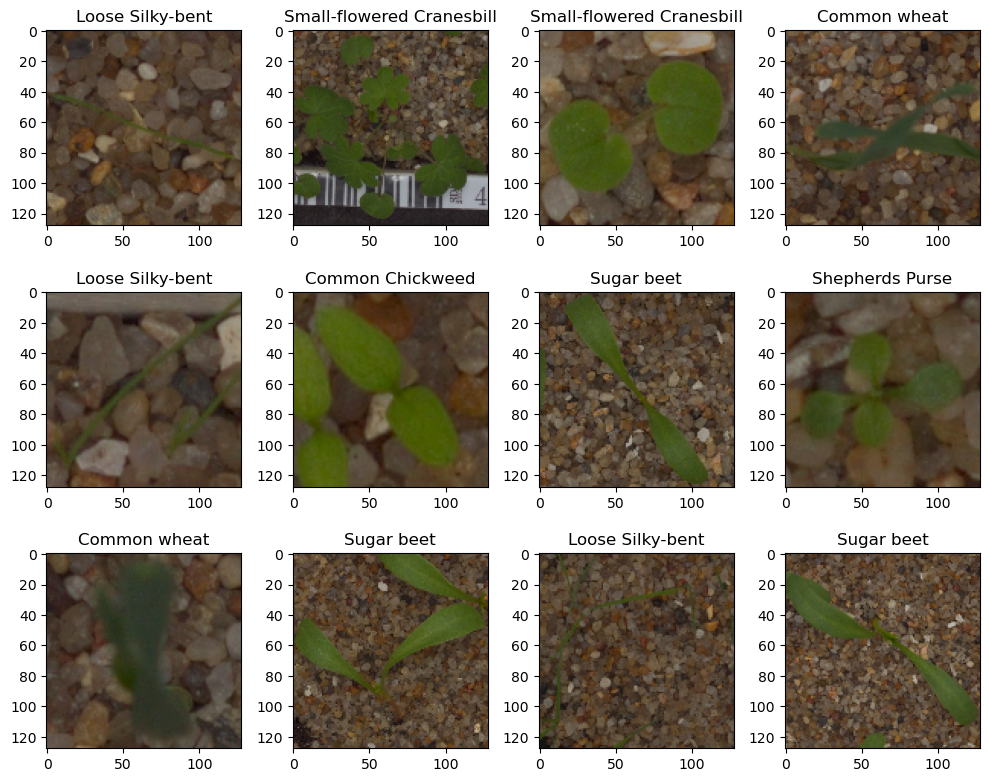

<IPython.core.display.Javascript object>

In [16]:
# View a selection of our RGB images
random_image_grid(rgb_seedlings)

These look more realistic and color balanced as we would expect.

### Let's try to pull out the green leaf shapes first

While we still have these larger images, let's try Gaussian Blurring to blur out the background and pull the green leaf shapes forward, then we'll resize the images.

In [17]:
# Define the range for green color we're interested in
lower_green = (25, 40, 50)
upper_green = (95, 255, 255)

filtered_seedlings = []  # we'll append our filtered images here

for image in rgb_seedlings:
    blurred_img = cv2.GaussianBlur(
        image, (3, 3), 0
    )  # 3x3 kernel, with auto-calculated std deviation

    hsv_img = cv2.cvtColor(
        blurred_img, cv2.COLOR_BGR2HSV
    )  # convert RGB to HSV to easily apply our mask
    mask = cv2.inRange(
        hsv_img, lower_green, upper_green
    )  # mask out non-leafy green colors

    kernel = cv2.getStructuringElement(
        cv2.MORPH_ELLIPSE, (10, 10)
    )  # build our 10x10 structuring element (elipse)
    mask = cv2.morphologyEx(
        mask, cv2.MORPH_CLOSE, kernel
    )  # close the gaps in the mask region
    bMask = mask > 0  # create a boolean mask for regions outside the mask
    clearImg = np.zeros_like(image, np.uint8)  # Create empty image
    clearImg[bMask] = image[bMask]

    filtered_seedlings.append(clearImg)

# Convert the list of blurred images back to a NumPy array
filtered_seedlings = np.array(filtered_seedlings)

<IPython.core.display.Javascript object>

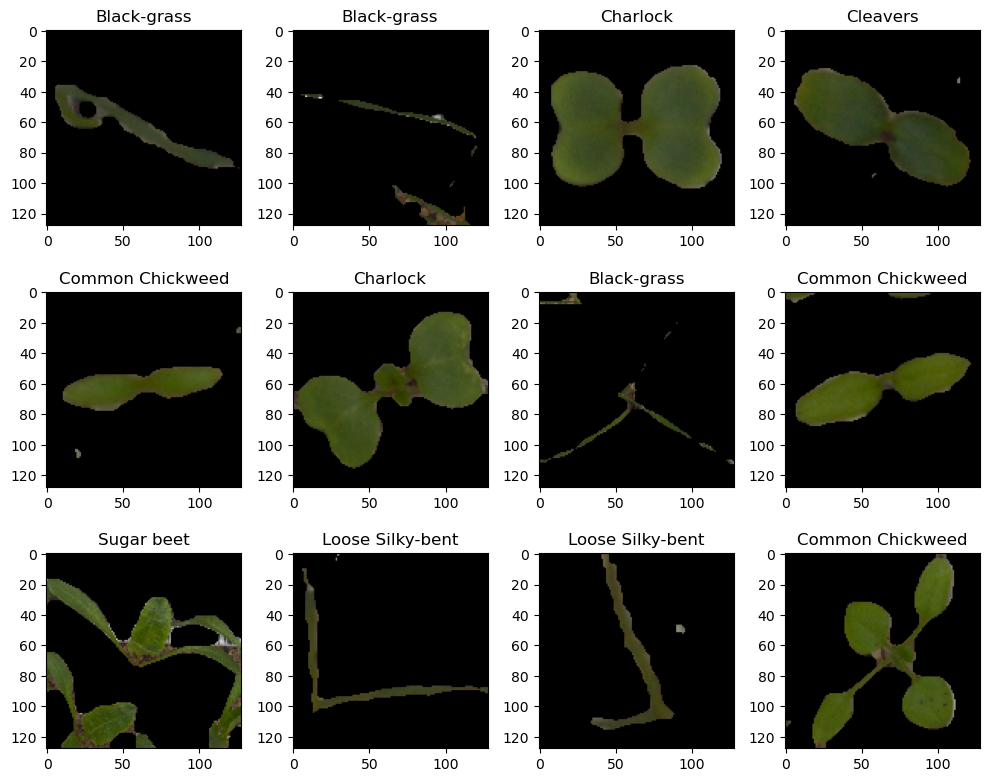

<IPython.core.display.Javascript object>

In [18]:
# View a selection of our filtered images
random_image_grid(filtered_seedlings)

These look pretty good, filtering out the background and giving us a good sense of the shapes of each of these seedling species. We worked with the higher resolution images; let's resize these into more efficient sizes.

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [19]:
new_height, new_width = 64, 64
resized_seedlings = []
for large_image in filtered_seedlings:
    resized_image = cv2.resize(large_image, (new_width, new_height))
    resized_seedlings.append(resized_image)

# Convert the list of resized RGB images back to a NumPy array
resized_seedlings = np.array(resized_seedlings)

<IPython.core.display.Javascript object>

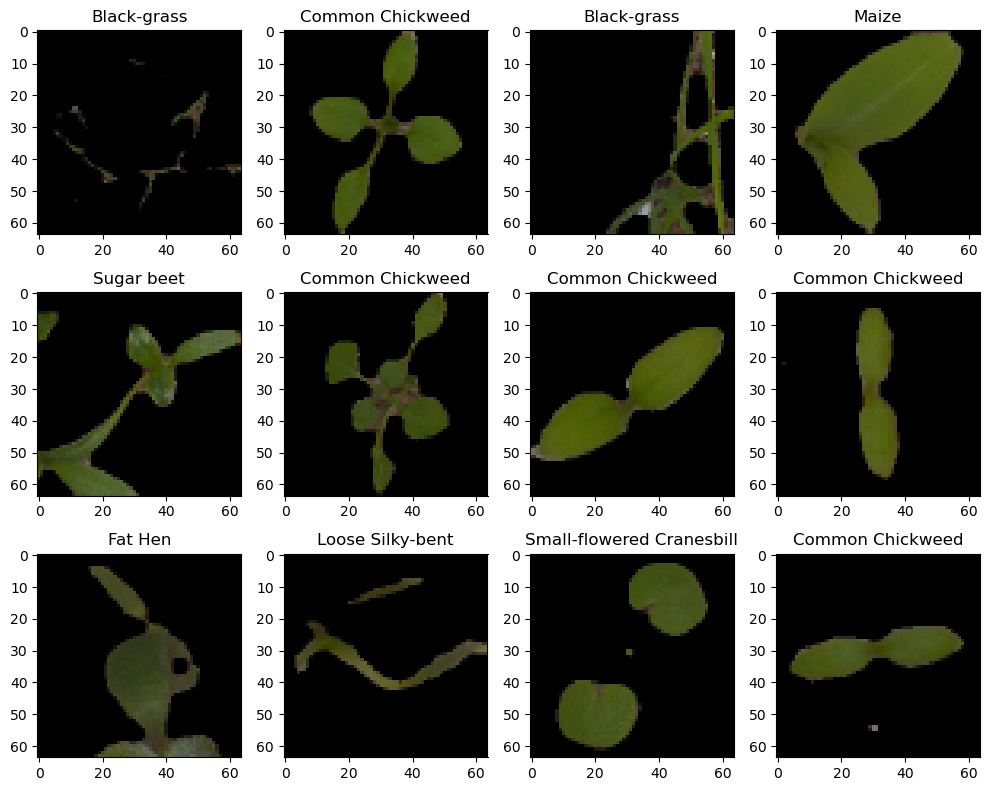

<IPython.core.display.Javascript object>

In [20]:
# View a selection of our resized images
random_image_grid(resized_seedlings)

These cleaned up images look pretty good - we've got clean leaf shapes in the correct scale, and we're ready to move on to data preparation for building our model.

## Data Preparation for Modeling

### Split the datasets

In [21]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    resized_seedlings,
    species,
    test_size=0.30,
    stratify=species,
    random_state=1,
)

# preserve the original complete data sets
X = resized_seedlings.copy()
Y = species.copy()

<IPython.core.display.Javascript object>

In [22]:
# Review the shapes of the resulting train, test, and validate sets
print("Training data shapes:", X_train.shape, y_train.shape)
print("Testing data shapes:", X_test.shape, y_test.shape)

Training data shapes: (3325, 64, 64, 3) (3325, 1)
Testing data shapes: (1425, 64, 64, 3) (1425, 1)


<IPython.core.display.Javascript object>

### Encode the target labels

In [23]:
# Initialize and fit a label encoder
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(species["Label"])

LabelEncoder()

<IPython.core.display.Javascript object>

In [24]:
# Enumerate the classes
print("Classes: " + str(label_encoder.classes_))

Classes: ['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']


<IPython.core.display.Javascript object>

In [25]:
# Transform the y_train labels
encoded_labels = label_encoder.fit_transform(y_train)
onehot_encoder = OneHotEncoder(sparse=False)

encoded_labels_reshaped = encoded_labels.reshape(-1, 1)
onehot_encoded_labels = onehot_encoder.fit_transform(encoded_labels_reshaped)

y_train_labels = encoded_labels_reshaped
y_train_encoded = onehot_encoded_labels

# Transform the y_test labels
encoded_labels = label_encoder.fit_transform(y_test)
onehot_encoder = OneHotEncoder(sparse=False)

# Create a list of unique text labels in the original test set
unique_text_labels = y_test["Label"]

# Create a dictionary for seedling class mapping
class_mapping = [
    (numerical_label, text_label)
    for numerical_label, text_label in zip(encoded_labels, unique_text_labels)
]
# Create a dictionary to look up class name by numerical value
class_dict = {
    numerical_label: class_name for numerical_label, class_name in class_mapping
}

encoded_labels_reshaped = encoded_labels.reshape(-1, 1)
onehot_encoded_labels = onehot_encoder.fit_transform(encoded_labels_reshaped)

y_test_labels = encoded_labels_reshaped
y_test_encoded = onehot_encoded_labels

# Confirm the number of classes
num_classes = y_test_encoded.shape[1]

print("Number of classes:\n", num_classes)
print("-------------------------")
print("\nOriginal labels:\n", y_test)
print("-------------------------")
print("\nEncoded labels:\n", y_test_labels)
print("-------------------------")
print("\nOne-hot encoded labels:\n", y_test_encoded)
print("-------------------------")
print("\nClass Mapping:\n", class_dict)

Number of classes:
 12
-------------------------

Original labels:
                   Label
3326         Sugar beet
3840        Black-grass
3322         Sugar beet
3905        Black-grass
4424   Loose Silky-bent
...                 ...
3732              Maize
2559           Cleavers
4348   Loose Silky-bent
3031  Scentless Mayweed
4296   Loose Silky-bent

[1425 rows x 1 columns]
-------------------------

Encoded labels:
 [[11]
 [ 0]
 [11]
 ...
 [ 6]
 [ 8]
 [ 6]]
-------------------------

One-hot encoded labels:
 [[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
-------------------------

Class Mapping:
 {11: 'Sugar beet', 0: 'Black-grass', 6: 'Loose Silky-bent', 3: 'Common Chickweed', 10: 'Small-flowered Cranesbill', 2: 'Cleavers', 9: 'Shepherds Purse', 5: 'Fat Hen', 7: 'Maize', 8: 'Scentless Mayweed', 1: 'Charlock', 4: 'Common wheat'}


<IPython.core.display.Javascript object>

### Data Normalization

In [26]:
## Normalizing the image data
X_train = X_train / 255.0
X_test = X_test / 255.0

<IPython.core.display.Javascript object>

## Model Building

In [27]:
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(3)
random.seed(3)
tf.random.set_seed(3)

<IPython.core.display.Javascript object>

In [28]:
# Reset / clear the keras backend between models
backend.clear_session()

<IPython.core.display.Javascript object>

#### Initial Simple Model

__In this model, we're skipping any kind of dropout, batch normalization, augmentation, and any early stopping or learning rate scheduling strategy. We're also also ignoring the class imbalance in the source data, and we'll see the results from that shortly.__

In [29]:
# Intializing a sequential model
model_0 = Sequential()

# Adding first convolutional layer with 64 filters and kernel size 3x3 , maintaining the same output size
model_0.add(
    Conv2D(64, (3, 3), activation="relu", padding="same", input_shape=(64, 64, 3))
)

# Adding max pooling to reduce the size of output of first conv layer
model_0.add(MaxPooling2D((2, 2), padding="same"))

# Adding additional convolutional / pooling layers
model_0.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model_0.add(MaxPooling2D((2, 2), padding="same"))
model_0.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model_0.add(MaxPooling2D((2, 2), padding="same"))


model_0.add(Conv2D(256, (3, 3), activation="relu", padding="same"))
model_0.add(MaxPooling2D((2, 2), padding="same"))
model_0.add(Conv2D(256, (3, 3), activation="relu", padding="same"))
model_0.add(MaxPooling2D((2, 2), padding="same"))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_0.add(Flatten())

# Adding a fully connected dense layer with 128 neurons
model_0.add(Dense(128, activation="relu"))

# Adding the output layer with 12 neurons and softmax activation since this is a multi-class classification problem
model_0.add(Dense(12, activation="softmax"))

# Using Adam Optimizer
opt = Adam()

# Compile model
model_0.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

<IPython.core.display.Javascript object>

__We'll summarize and visualize the model__

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 128)        0

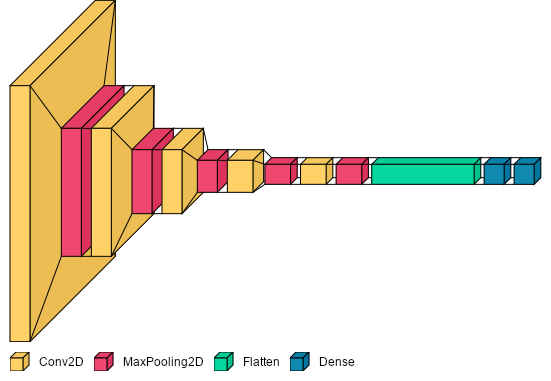

<IPython.core.display.Javascript object>

In [30]:
# Summarize the model
model_0.summary()

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(model_0, legend=True, font=font)

In [31]:
%%time
# Fit the model to the training data
history_0 = model_0.fit(X_train, y_train_encoded, epochs=100, validation_split=0.20)

Epoch 1/100
84/84 [==============================] - 1s 10ms/step - loss: 2.1386 - accuracy: 0.2549 - val_loss: 1.7281 - val_accuracy: 0.3925
Epoch 2/100
84/84 [==============================] - 1s 8ms/step - loss: 1.6560 - accuracy: 0.4199 - val_loss: 1.7153 - val_accuracy: 0.3820
Epoch 3/100
84/84 [==============================] - 1s 7ms/step - loss: 1.3711 - accuracy: 0.5019 - val_loss: 1.1853 - val_accuracy: 0.5970
Epoch 4/100
84/84 [==============================] - 1s 8ms/step - loss: 1.0545 - accuracy: 0.6267 - val_loss: 0.9173 - val_accuracy: 0.6827
Epoch 5/100
84/84 [==============================] - 1s 8ms/step - loss: 0.7851 - accuracy: 0.7229 - val_loss: 0.8093 - val_accuracy: 0.7368
Epoch 6/100
84/84 [==============================] - 1s 7ms/step - loss: 0.5932 - accuracy: 0.7876 - val_loss: 0.6752 - val_accuracy: 0.7323
Epoch 7/100
84/84 [==============================] - 1s 8ms/step - loss: 0.4297 - accuracy: 0.8564 - val_loss: 0.7742 - val_accuracy: 0.7489
Epoch 8/100


<IPython.core.display.Javascript object>

#### Results

In [32]:
print("Training:", model_0.evaluate(X_train, y_train_encoded))  # Evaluate on train set
print("Testing:", model_0.evaluate(X_test, y_test_encoded))  # Evaluate on test set

104/104 [==============================] - 0s 3ms/step - loss: 0.2727 - accuracy: 0.9624
Training: [0.2726894021034241, 0.9624060392379761]
45/45 [==============================] - 0s 3ms/step - loss: 1.3683 - accuracy: 0.8049
Testing: [1.3683067560195923, 0.804912269115448]


<IPython.core.display.Javascript object>

* __Executes quickly, with a substantial gap between training and testing that indicates overfitting__

#### Plotting Accuracy

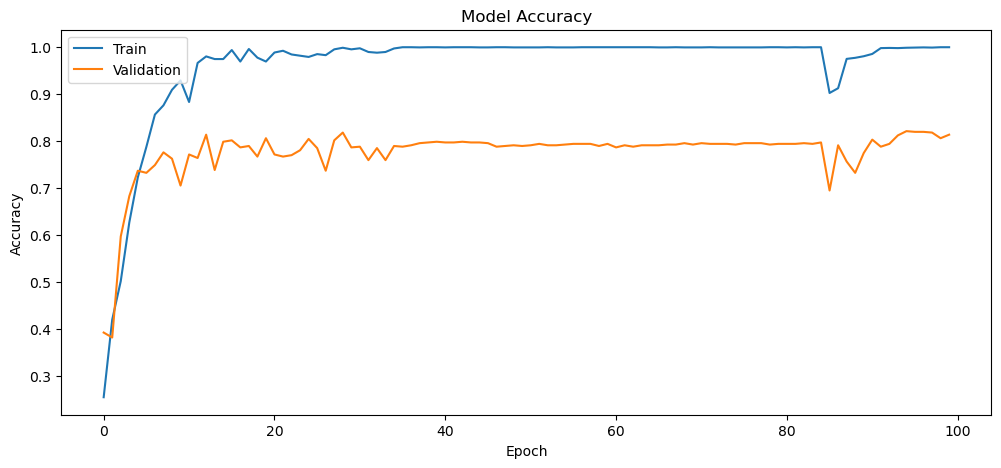

<IPython.core.display.Javascript object>

In [33]:
plt.plot(history_0.history["accuracy"])
plt.plot(history_0.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

* __Accuracy peaks in a little less than 30 epochs__
* __Confirms this model overfits__

#### Plotting Loss

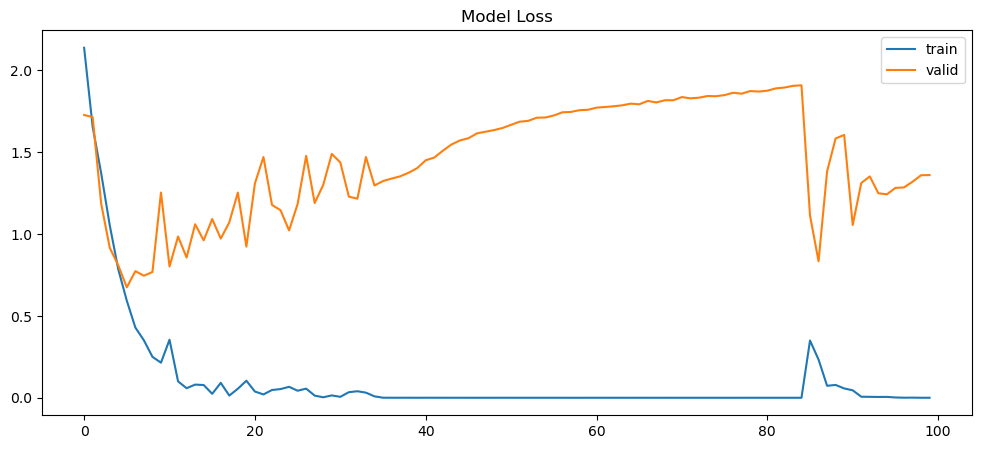

<IPython.core.display.Javascript object>

In [34]:
# Capturing learning history per epoch
hist = pd.DataFrame(history_0.history)
hist["epoch"] = history_0.epoch

# Plotting accuracy at different epochs
plt.title("Model Loss")
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.legend(("train", "valid"), loc=0)


* __Also a clear indication of an overfit model. Loss is minimized in about 10 epochs__

### Predictions

In [35]:
# Making predictions on the test data
y_pred_test = model_0.predict(X_test)

# Converting probabilities to class labels
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_classes = y_pred_test_classes.reshape(-1, 1)

# Calculating the probability of the predicted class
# y_pred_test_max_probas = np.max(y_pred_test, axis=1)

45/45 [==============================] - 0s 2ms/step


<IPython.core.display.Javascript object>

In [36]:
# Printing the classification report
print(classification_report(y_test_labels, y_pred_test_classes))

              precision    recall  f1-score   support

           0       0.44      0.30      0.36        79
           1       0.89      0.86      0.88       117
           2       0.75      0.80      0.78        86
           3       0.89      0.90      0.89       183
           4       0.67      0.67      0.67        66
           5       0.86      0.82      0.84       143
           6       0.76      0.84      0.80       196
           7       0.72      0.77      0.74        66
           8       0.75      0.84      0.79       155
           9       0.82      0.72      0.77        69
          10       0.96      0.94      0.95       149
          11       0.82      0.80      0.81       116

    accuracy                           0.80      1425
   macro avg       0.78      0.77      0.77      1425
weighted avg       0.80      0.80      0.80      1425



<IPython.core.display.Javascript object>

* __Overall accuracy is ~80%, which is just barely useable__
* __Here's where we start to see the results of some classes that are under-represented in the the training data__
* __You can clearly see that classes with poor support - fewer occurrences in the data - show lower accuracy__

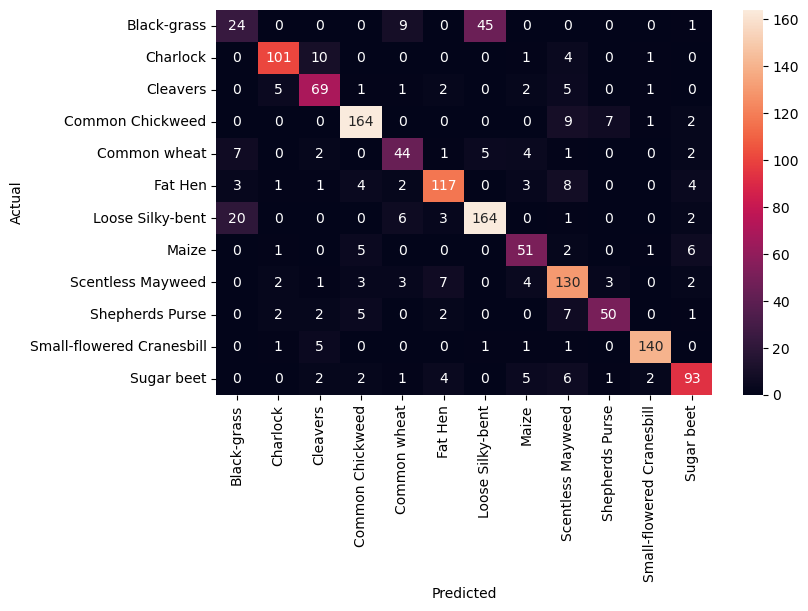

<IPython.core.display.Javascript object>

In [37]:
# Plotting the heatmap using confusion matrix
ordered_class_names = [class_dict[key] for key in sorted(class_dict.keys())]
cm = confusion_matrix(y_test_labels, y_pred_test_classes)
plt.figure(figsize=(8, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt=".0f",
    xticklabels=ordered_class_names,
    yticklabels=ordered_class_names,
)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

* __And here we see which classes are poorly performing...__
* __Black-grass and Loose Silky-bent are significantly confused__
* __Black-grass samples are poorly represented in the source data__

## Model Performance Improvement

### Model optimizations:
__For this model, we'll use several techniques to try to improve our performance. We saw a few opportunities in the previous model including improving the balance of classes represented, augmenting the existing images to provide greater diversity in training data, regularization and batch normalization, and learning rate scheduling.__

In [38]:
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(3)
random.seed(3)
tf.random.set_seed(3)

<IPython.core.display.Javascript object>

In [39]:
# Reset / clear the keras backend between models
backend.clear_session()

<IPython.core.display.Javascript object>

### Oversampling to balance my training data
__How are my classes currently represented in the training data?__

In [40]:
# Current class counts in my existing training set
unique_classes, class_counts = np.unique(
    np.argmax(y_train_encoded, axis=1), return_counts=True
)
for class_label, count in zip(unique_classes, class_counts):
    print(f"Class {class_label}: Count = {count}")

Class 0: Count = 184
Class 1: Count = 273
Class 2: Count = 201
Class 3: Count = 428
Class 4: Count = 155
Class 5: Count = 332
Class 6: Count = 458
Class 7: Count = 155
Class 8: Count = 361
Class 9: Count = 162
Class 10: Count = 347
Class 11: Count = 269


<IPython.core.display.Javascript object>

#### I'm going to apply both SMOTE oversampling and data augmentation to my training data set only.
* __SMOTE to attempt to rebalance the classes represented in my test data; under-represented classes are mis-identified in my previous model__
* __Data Augmentation to provide greater diversity in the training images to improve recognition in a variety of orientations and photo qualities.__

In [41]:
# To oversample, we'll need to first flatten our image data
print("Current X_train shape:", X_train.shape)
num_samples, height, width, channels = X_train.shape
X_train_flattened = X_train.reshape(num_samples, height * width * channels)

Current X_train shape: (3325, 64, 64, 3)


<IPython.core.display.Javascript object>

In [42]:
# Initialize SMOTE
smote = SMOTE(sampling_strategy="auto", random_state=3)

<IPython.core.display.Javascript object>

In [43]:
# resample my flattened image data, and my y training labels
X_train_resampled, y_train_resampled = smote.fit_resample(
    X_train_flattened, y_train_labels
)

<IPython.core.display.Javascript object>

In [44]:
# shuffle the resampled datasets
X_train_resampled, y_train_resampled = shuffle(
    X_train_resampled, y_train_resampled, random_state=3
)

<IPython.core.display.Javascript object>

In [45]:
# Now we'll need to one-hot encode the labels again
onehot_encoder = OneHotEncoder(sparse=False)

encoded_labels_reshaped = y_train_resampled.reshape(-1, 1)
onehot_encoded_labels = onehot_encoder.fit_transform(encoded_labels_reshaped)

y_train_resampled_encoded = onehot_encoded_labels

<IPython.core.display.Javascript object>

#### How did my rebalanced classes turn out in my training data?

In [46]:
# New class counts in my resampled training set
unique_classes, class_counts = np.unique(
    np.argmax(y_train_resampled_encoded, axis=1), return_counts=True
)
for class_label, count in zip(unique_classes, class_counts):
    print(f"Class {class_label}: Count = {count}")

Class 0: Count = 458
Class 1: Count = 458
Class 2: Count = 458
Class 3: Count = 458
Class 4: Count = 458
Class 5: Count = 458
Class 6: Count = 458
Class 7: Count = 458
Class 8: Count = 458
Class 9: Count = 458
Class 10: Count = 458
Class 11: Count = 458


<IPython.core.display.Javascript object>

__Looks good! One more step is to "unflatten" my resampled image data; we'll reshape it back into my numpy image array__

In [47]:
print("Flattened X_train shape:", X_train_resampled.shape)
samples = len(X_train_resampled)
X_train_resampled_unflattened = X_train_resampled.reshape(samples, 64, 64, 3)
print("Unflattened, resampled X_train shape:", X_train_resampled_unflattened.shape)

Flattened X_train shape: (5496, 12288)
Unflattened, resampled X_train shape: (5496, 64, 64, 3)


<IPython.core.display.Javascript object>

__For this next step, we'll definitely need to further split my training data into a validation set, as well.__
__We'll clean up the file names we're using after all these transformations, to be clearer__

In [48]:
X_train, X_val, y_train, y_val, = train_test_split(
    X_train_resampled_unflattened,
    y_train_resampled_encoded,
    test_size=0.20,
    stratify=y_train_resampled_encoded,
    random_state=3,
)

<IPython.core.display.Javascript object>

#### The balanced data we're currently working with:

In [49]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_val shape: ", X_val.shape)
print("y_val shape: ", y_val.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape, "(unencoded)")
print("y_test_encoded shape", y_test_encoded.shape)

X_train shape:  (4396, 64, 64, 3)
y_train shape:  (4396, 12)
X_val shape:  (1100, 64, 64, 3)
y_val shape:  (1100, 12)
X_test shape:  (1425, 64, 64, 3)
y_test shape:  (1425, 1) (unencoded)
y_test_encoded shape (1425, 12)


<IPython.core.display.Javascript object>

### Data Augmentation
__Set up the augmentation parameters our training data__

In [50]:
# Create an ImageDataGenerator instance with augmentation settings
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest",
)

# Create an ImageDataGenerator instance for validation (without augmentation)
validation_datagen = ImageDataGenerator()

<IPython.core.display.Javascript object>

In [51]:
# Fit the ImageDataGenerator on your data
datagen.fit(X_train)

<IPython.core.display.Javascript object>

In [52]:
# Create the iterator
augmented_iterator = datagen.flow(X_train, y_train, batch_size=32)

<IPython.core.display.Javascript object>

### Learning Rate Reduction
__Reduce my learning rate as loss plateaus__

In [53]:
# Configure the parameters for learning rate reduction
lr_reduce = ReduceLROnPlateau(
    monitor='val_loss',    # Monitor validation loss
    factor=0.1,            # Reduce learning rate by a factor of 0.1 when plateau is detected
    patience=4,            # Number of epochs with no improvement after which learning rate will be reduced
    verbose=1,             # Print a message when learning rate is reduced
    min_lr=1e-6            # Minimum learning rate
)


<IPython.core.display.Javascript object>

### Early Stopping
__Quit while we're ahead__

In [54]:
# Configure the parameters for early stopping
early_stopping = EarlyStopping(
    monitor="val_loss",  # Monitor validation loss
    patience=10,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True,  # Restore model weights to the best achieved during training
)

<IPython.core.display.Javascript object>

#### Complex Model with Dynamic Evaluation
__For this model, we'll use essentially the same structure, but I'll add batch normalization and dropout layers to the model__
__We'll structure this to work with batches of augmented data__
__Also, we'll make use of callbacks to dynamically reduce the learning rate, and stop early when our validation accuracy plateaus__



In [55]:
# Intializing a new sequential model
model_1 = Sequential()

# Adding first convolutional layer with 64 filters and kernel size 3x3 , maintaining the same output size
model_1.add(
    Conv2D(64, (3, 3), activation="relu", padding="same", input_shape=(64, 64, 3))
)
# Adding max pooling to reduce the size of output of first conv layer
model_1.add(MaxPooling2D((2, 2), padding="same"))
# Adding Batch normalization layer
model_1.add(BatchNormalization())  # Batch normalization layer

# Adding additional convolutional / pooling / normalization layers
model_1.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model_1.add(MaxPooling2D((2, 2), padding="same"))
model_1.add(BatchNormalization())
model_1.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model_1.add(MaxPooling2D((2, 2), padding="same"))
model_1.add(BatchNormalization())

model_1.add(Conv2D(256, (3, 3), activation="relu", padding="same"))
model_1.add(MaxPooling2D((2, 2), padding="same"))
model_1.add(BatchNormalization())
model_1.add(Conv2D(256, (3, 3), activation="relu", padding="same"))
model_1.add(MaxPooling2D((2, 2), padding="same"))
model_1.add(BatchNormalization())

# Flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_1.add(Flatten())

# Adding a fully connected dense layer with 128 neurons
model_1.add(Dense(128, activation="relu"))
model_1.add(BatchNormalization())  # Batch normalization layer
model_1.add(Dropout(0.50))  # Dropout layer with 50% dropout rate

# Adding the output layer with 12 neurons and softmax activation since this is a multi-class classification problem
model_1.add(Dense(12, activation="softmax"))

# Using Adam Optimizer
opt = Adam()

# Compile model
model_1.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

<IPython.core.display.Javascript object>

__We'll summarize and visualize the model__

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                        

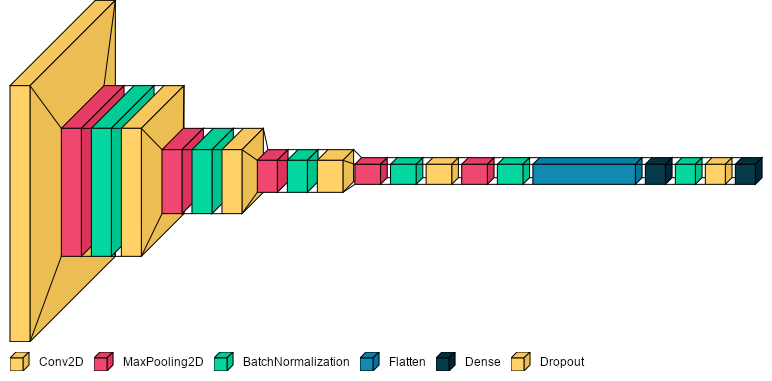

<IPython.core.display.Javascript object>

In [56]:
# Summarize the model
model_1.summary()

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(model_1, legend=True, font=font)

In [57]:
%%time
# Train and validate our model
history_1 = model_1.fit(
    datagen.flow(X_train, y_train, batch_size=32),  # Augmented data generator
    steps_per_epoch=len(X_train) // 32,             # Number of batches per epoch
    epochs=100,                                     # Early stopping will limit this
    validation_data=validation_datagen.flow(X_val, y_val), # Validation data
    callbacks=[lr_reduce,early_stopping]  # Pass the ReduceLROnPlateau and Early Stopping callbacks
)


Epoch 1/100
137/137 [==============================] - 5s 28ms/step - loss: 1.8780 - accuracy: 0.4070 - val_loss: 10.1079 - val_accuracy: 0.0836 - lr: 0.0010
Epoch 2/100
137/137 [==============================] - 4s 28ms/step - loss: 1.2112 - accuracy: 0.5937 - val_loss: 4.2979 - val_accuracy: 0.0864 - lr: 0.0010
Epoch 3/100
137/137 [==============================] - 4s 27ms/step - loss: 0.8922 - accuracy: 0.6911 - val_loss: 2.4922 - val_accuracy: 0.3618 - lr: 0.0010
Epoch 4/100
137/137 [==============================] - 4s 28ms/step - loss: 0.7253 - accuracy: 0.7461 - val_loss: 2.1060 - val_accuracy: 0.3936 - lr: 0.0010
Epoch 5/100
137/137 [==============================] - 4s 28ms/step - loss: 0.6188 - accuracy: 0.7862 - val_loss: 0.9518 - val_accuracy: 0.7264 - lr: 0.0010
Epoch 6/100
137/137 [==============================] - 4s 27ms/step - loss: 0.5791 - accuracy: 0.8084 - val_loss: 0.8719 - val_accuracy: 0.7036 - lr: 0.0010
Epoch 7/100
137/137 [==============================] - 4s

<IPython.core.display.Javascript object>

#### Results

In [58]:
print(
    "Training:",
    model_1.evaluate(X_train, y_train),
)  # Evaluate on train set
print("Testing:", model_1.evaluate(X_test, y_test_encoded))  # Evaluate on test set

138/138 [==============================] - 0s 3ms/step - loss: 0.0977 - accuracy: 0.9643
Training: [0.0977126732468605, 0.9642857313156128]
45/45 [==============================] - 0s 3ms/step - loss: 0.2065 - accuracy: 0.9305
Testing: [0.2064777910709381, 0.9305262565612793]


<IPython.core.display.Javascript object>

In [59]:
# Access the best validation accuracy achieved during training
best_val_accuracy = max(history_1.history["val_accuracy"])
print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")

Best Validation Accuracy: 0.9545


<IPython.core.display.Javascript object>

#### Plotting Accuracy

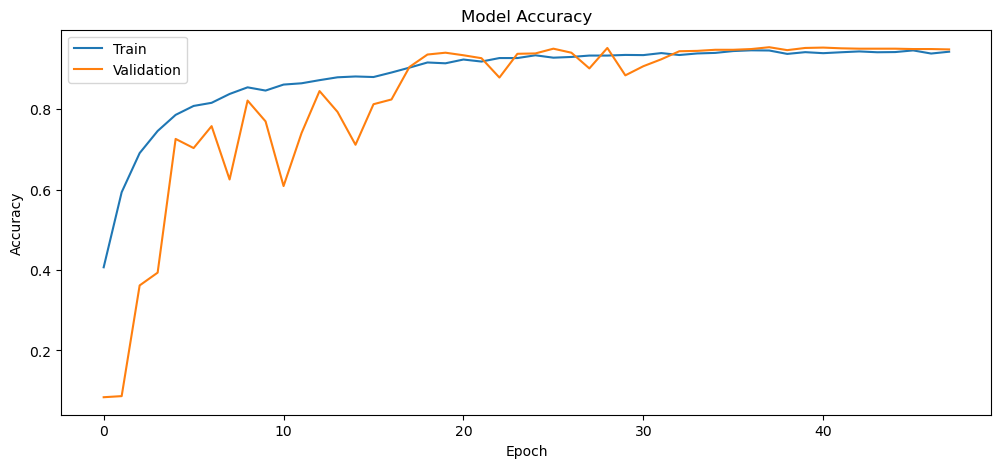

<IPython.core.display.Javascript object>

In [60]:
plt.plot(history_1.history["accuracy"])
plt.plot(history_1.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

* __Pretty variable start, but good convergence after about 30 epochs.__
* __Throttling down the learning rate helped to smooth out the results.__
* __While we configured for 100 epochs, early stopping helped ensure we didn't ramble on, or diverge again.__
* __This is good indication of fit to generalize, with close convergence of training and test accuracy.__

#### Plotting Loss

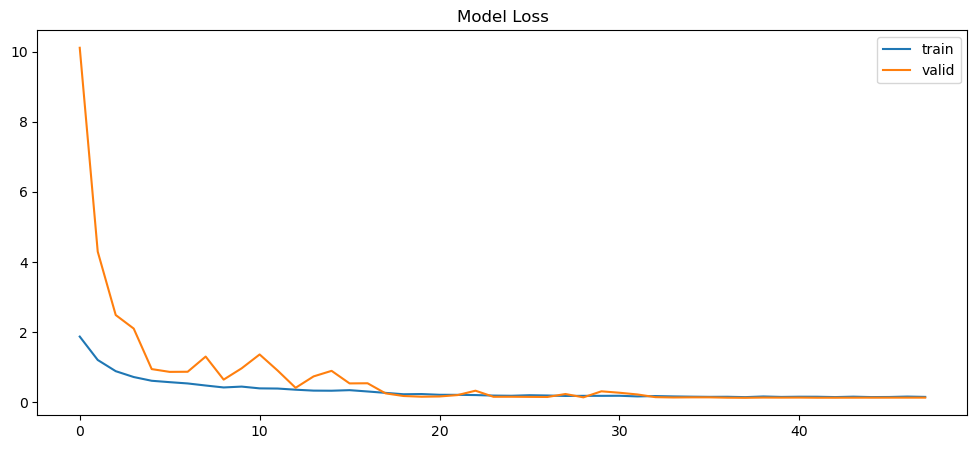

<IPython.core.display.Javascript object>

In [61]:
# Capturing learning history per epoch
hist = pd.DataFrame(history_1.history)
hist["epoch"] = history_1.epoch

# Plotting accuracy at different epochs
plt.title("Model Loss")
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.legend(("train", "valid"), loc=0)


* __Also tracks well, with a minimal variation to start and rapid smooth convergence.__

### Predictions

In [62]:
# Making predictions on the test data
y_pred_test = model_1.predict(X_test)

# Converting probabilities to class labels
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_classes = y_pred_test_classes.reshape(-1, 1)

# Calculating the probability of the predicted class
# y_pred_test_max_probas = np.max(y_pred_test, axis=1)

45/45 [==============================] - 0s 3ms/step


<IPython.core.display.Javascript object>

In [63]:
# Printing the classification report
print(classification_report(y_test_labels, y_pred_test_classes))

              precision    recall  f1-score   support

           0       0.68      0.48      0.56        79
           1       0.91      1.00      0.96       117
           2       0.94      0.93      0.94        86
           3       0.98      0.97      0.98       183
           4       0.90      0.94      0.92        66
           5       0.99      0.97      0.98       143
           6       0.82      0.91      0.86       196
           7       0.92      0.98      0.95        66
           8       0.99      0.97      0.98       155
           9       0.96      0.93      0.94        69
          10       0.99      0.99      0.99       149
          11       0.99      0.94      0.96       116

    accuracy                           0.93      1425
   macro avg       0.92      0.92      0.92      1425
weighted avg       0.93      0.93      0.93      1425



<IPython.core.display.Javascript object>

* __The overall results are pretty good, but with a class breakdown you can see weak areas of classification.__

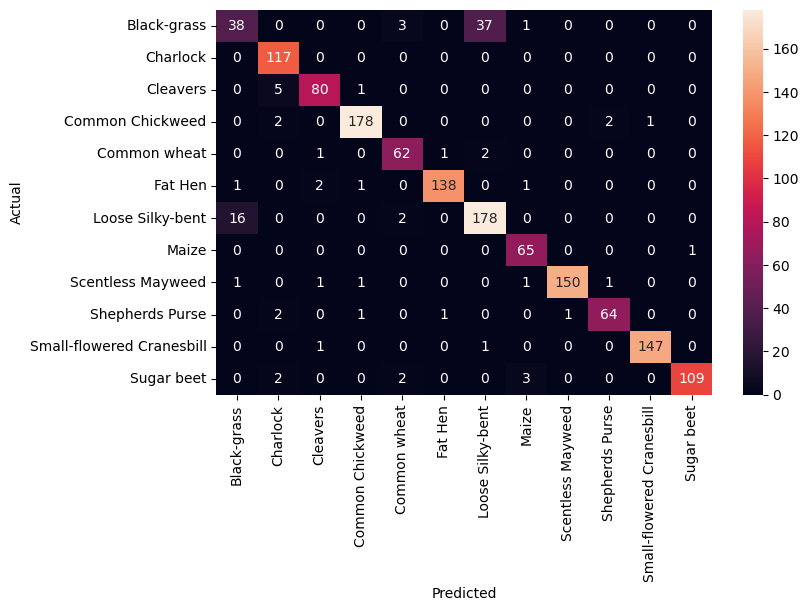

<IPython.core.display.Javascript object>

In [64]:
# Plotting the heatmap using confusion matrix
ordered_class_names = [class_dict[key] for key in sorted(class_dict.keys())]
cm = confusion_matrix(y_test_labels, y_pred_test_classes)
plt.figure(figsize=(8, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt=".0f",
    xticklabels=ordered_class_names,
    yticklabels=ordered_class_names,
)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

* __Predictably, we still have issues distinguishing Black-grass and Loose Silky-bent seedlings__
* __While the results did improve significantly over the first model, the identification accuracy for Black-grass remains poor__

## Final Model: Results

__In the final model, we started with the same set of processed images - we had converted these to RGB, used a Gaussian blur and a mask to pull out the green leafy portion of the image, and we resized them to make them easier to work with.__

__Between the inital basic model and the final model, we then balanced the classes represented in the training data, augmented the images with several types of transformations (rotations, flips, zoom, etc.) and we implemented two new strategies in our fit operation: Learning Rate Reduction, and Early Stopping.__

__We also modified the convolutional neural network model to incorporate batch normalization layers, and a dropout layer.__

__Cumulatively, these changes resulted in an improvement in overall accuracy from about 80% to about 93%. That's an impressive gain; the cost in compute roughly tripled, although the implementation of early stopping helped to limit the resources required to execute the final model.__

#### Remaining Issues:

__While the overall accuracy for prediction is excellent, we can see in the breakdown by class that there is still a specific problem area distinguishing the Black-grass seedlings, and to a lesser extent the Small-Flowered Cranesbill.__

__This is most probably an issue that could be resolved by refining how we process the images to provide better visual differentiation, but it helps to illustrate how a well-performing model can have some very specific weaknesses.__

#### Model Recommendation:

__Overall, I would be confident putting the final model into production with it's current performance.__

#### Visualize the Final Model

In [65]:
visual_settings = {
    "MAX_NEURONS": 12,
    "INPUT_DENSE_COLOR": "teal",
    "INPUT_EMBEDDING_FONT": "black",
    "HIDDEN_CONV_COLOR": "yellow",
    "HIDDEN_CONV_FONT": "black",
    "HIDDEN_POOLING_COLOR": "salmon",
    "HIDDEN_POOLING_FONT": "black",
    "HIDDEN_DENSE_COLOR": "magenta",
    "HIDDEN_LAYER_COLOR": "green",
    "HIDDEN_LAYER_FONT": "black",
    "OUTPUT_DENSE_COLOR": "yellow",
    "INPUT_LAYER_COLOR": "cyan",
    "INPUT_LAYER_FONT": "white",
}

visualizer(model_1, file_format="png", file_name="graph", settings=visual_settings)

<IPython.core.display.Javascript object>

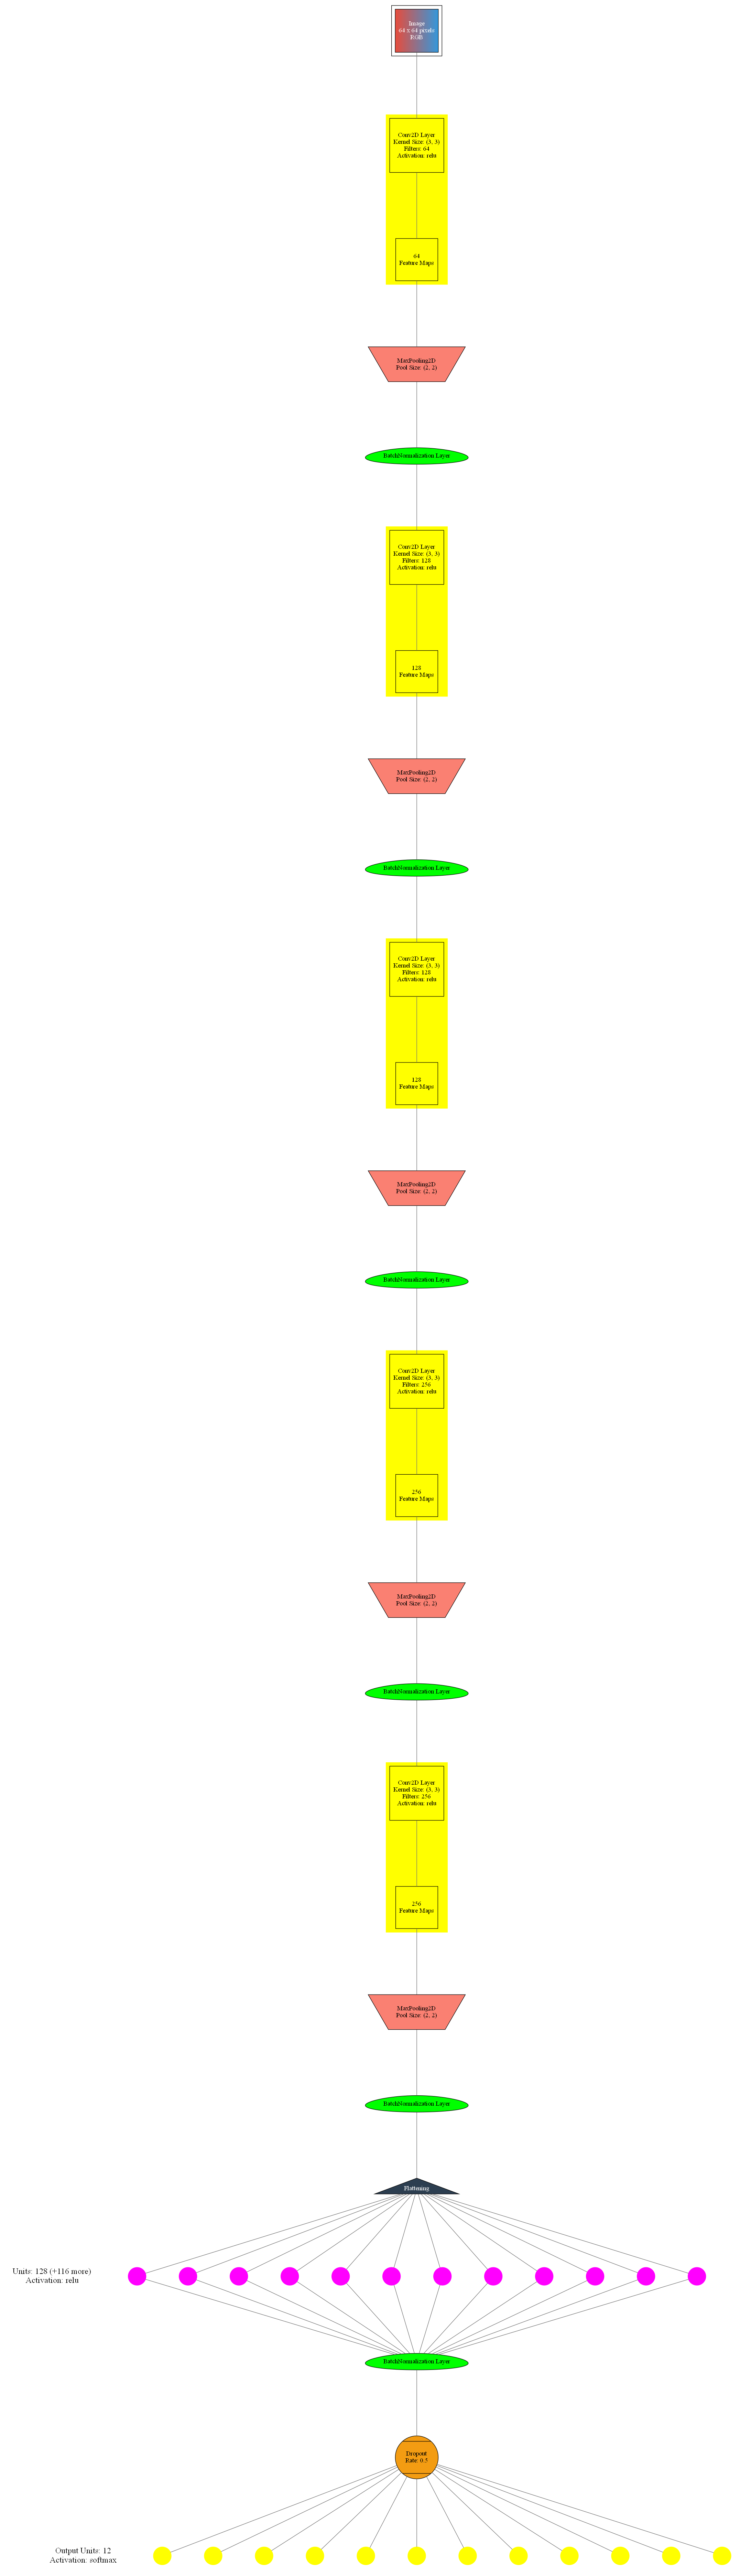

<IPython.core.display.Javascript object>

In [66]:
from IPython.display import Image

Image("graph.png")

### Visualizing the predictions

__Typical Performance__

This grid represents the typical performance; it's randomly generated, and there may be a few mis-classifications that appear in any random sample of the results.  But for the most part, our predictions are matching our actuals well and we can visually confirm that with the images, the prediction, and the actual label.

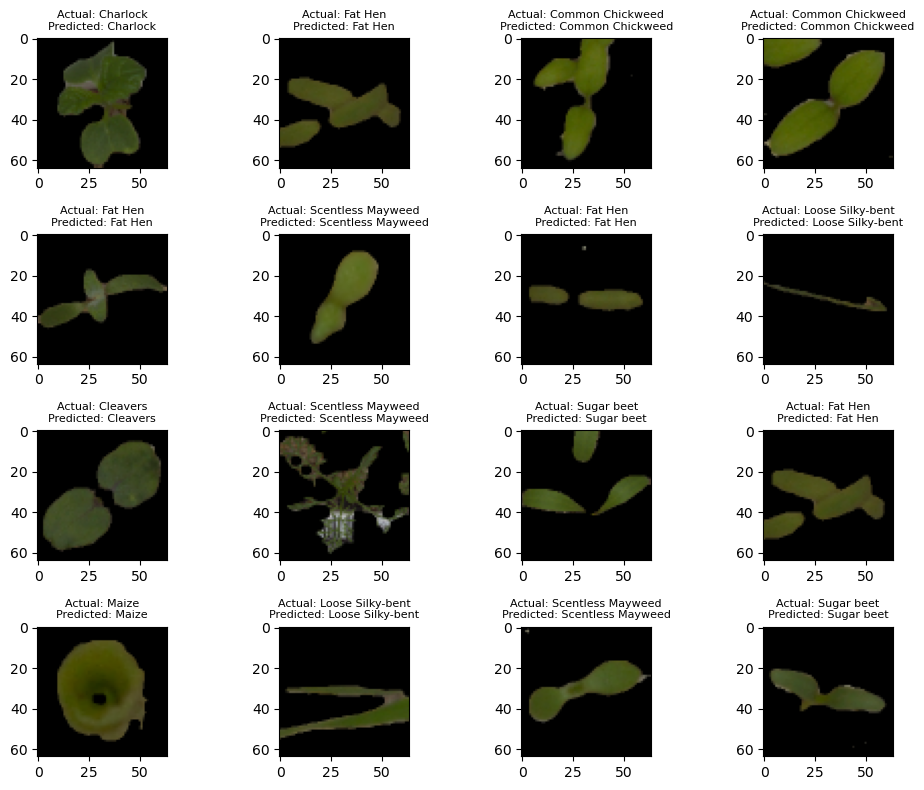

<IPython.core.display.Javascript object>

In [67]:
    rows = 4
    cols = 4
    fig = plt.figure(figsize=(10, 8))

    for i in range(cols):
                    
        for j in range(rows):
            random_index = np.random.randint(0, len(y_test_labels))
            
            ax = fig.add_subplot(rows, cols, i * rows + j + 1)
            ax.imshow(X_test[random_index])

            actual_class = int(y_test_labels[random_index])
            actual_class_name = class_dict.get(actual_class)
            
            predicted_class = int(y_pred_test_classes[random_index])
            predicted_class_name = class_dict.get(predicted_class)
                         
            ax.set_title(f"Actual: {actual_class_name}\nPredicted: {predicted_class_name}", fontsize=8)

    plt.tight_layout()
    plt.show()


#### Examples of incorrect classification

For this grid, we're actually filtering on mis-classifications to illustrate where we are unable to distinguish seedlings correctly. Looking at these examples can help us determine how we can improve the representation of our seedling images to be more distinct and useful.

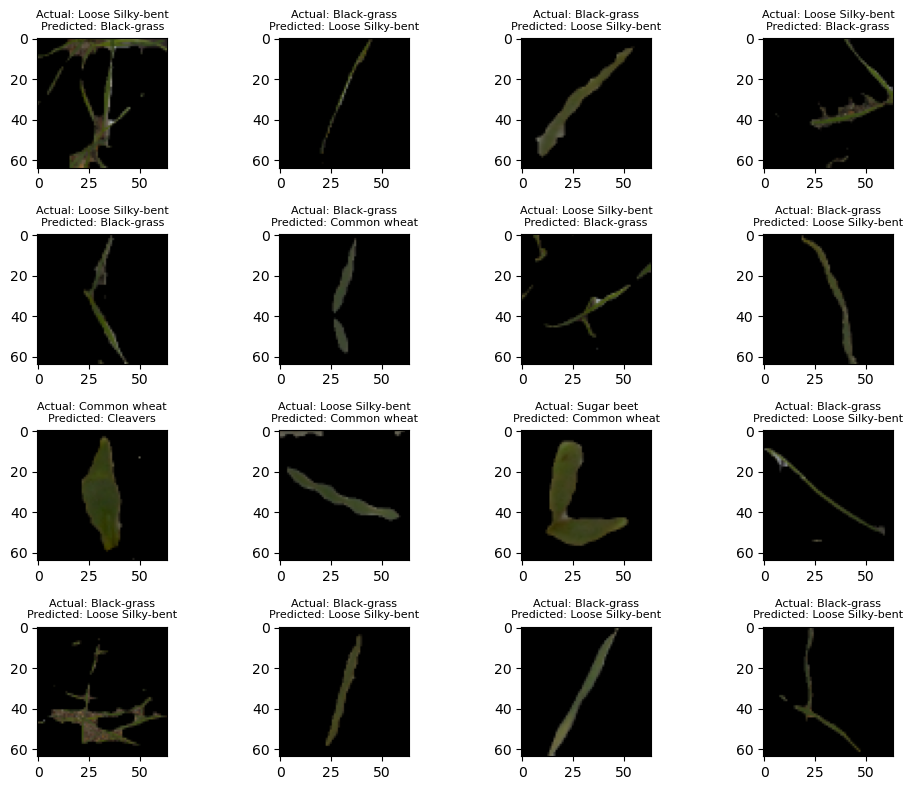

<IPython.core.display.Javascript object>

In [68]:
rows = 4
cols = 4
fig = plt.figure(figsize=(10, 8))

# Filter out the indices of images where predicted class and actual class don't match
mismatched_indices = [
    i
    for i, (actual, predicted) in enumerate(zip(y_test_labels, y_pred_test_classes))
    if actual != predicted
]

# Shuffle the mismatches
np.random.shuffle(mismatched_indices)

for i in range(cols):
    for j in range(rows):
        random_index = mismatched_indices[i * rows + j]

        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.imshow(X_test[random_index])

        actual_class = int(y_test_labels[random_index])
        actual_class_name = class_dict.get(actual_class)

        predicted_class = int(y_pred_test_classes[random_index])
        predicted_class_name = class_dict.get(predicted_class)

        ax.set_title(
            f"Actual: {actual_class_name}\nPredicted: {predicted_class_name}",
            fontsize=8,
        )

plt.tight_layout()
plt.show()

## Actionable Insights and Business Recommendations

* __Overall, we have a robust and useful model with 93% accuracy__
* __Our recommended model actively conserves computing resources, and is designed to execute efficiently__
* __All of our photos are top-down, and rely upon two-dimensional leaf shape to distinguish seedlings__
* __We should consider capturing additional images that include side views of the seedlings to help distinguish them__
* __It's critically important we start with well-focused images; we should take clear photographs__
* __We could consider photographing leaves in other wavelengths than just visible light - that might give us more detail (thermal, reflective, etc) to help distinguish types__
* __We should institute a manual review for images classified as Black-grass or Loose Silky-bent seedlings to confirm their correct classification__

_____